# Preprocess Notebook
This notebook gives an example on how to preprocess raw data from Stratus UV setup using the `struvana` package

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.jet() # jet map
from struvana.preprocess import RawDataManager

<Figure size 432x288 with 0 Axes>

Set path to raw data and path to save the preprocessed data and plots.
Be careful: `raw_data` should be the path to the raw data and should not contain any number at the and and no ".dat". 
So, if the files are in the folder "/Users/lorenzo/Documents/PhD/StratusUV/Experiments/uridine/data/27" and we have "d220527_01_pseudo_294_magic.dat", "d220527_01_pseudo_294_magic_0.dat", "d220527_01_pseudo_294_magic_1.dat", then:
`raw_data="/Users/lorenzo/Documents/PhD/StratusUV/Experiments/uridine/data/27/d220527_01_pseudo_294_magic"`

In [3]:
raw_data="/Users/lorenzo/Documents/PhD/StratusUV/Experiments/uridine/raw_data/27/d220527_01_pseudo_294_magic"
save_path = "/Users/lorenzo/Documents/PhD/StratusUV/Experiments/uridine/processed_data"

In [4]:
data = RawDataManager(file_path = raw_data, save_path = save_path)

Let's plot a first view of the mean measurement. 

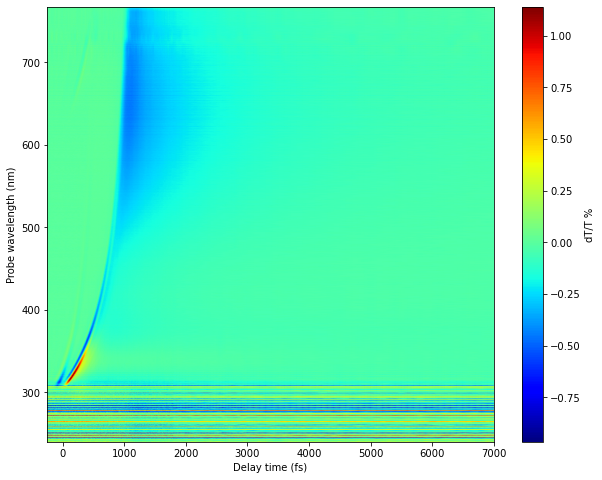

In [5]:
data.plot_map(figsize=(10,8))

### Cut scans
Let's keep wavelenghts between 320 and 700 and plot again

In [6]:
data.cut_scans(320, 700)

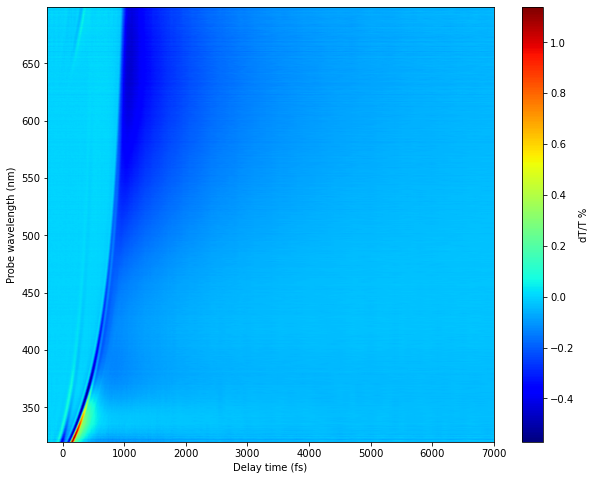

In [7]:
data.plot_map(figsize=(10,8))

### Denoise
Remove noise as average of negative delays. Firstly we plot a zoomed map on negative delays to set the last delay to use in the computing of noise.

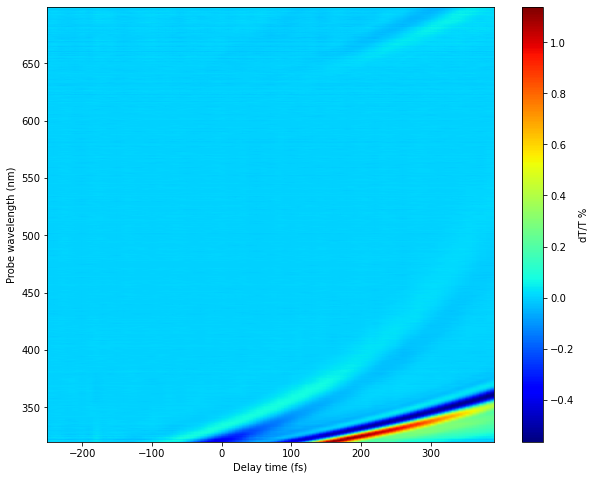

In [8]:
data.plot_map(figsize=(10,8), maxDelay = 400)

We can compute the average before -100 and use to remove the noise.

In [9]:
data.denoise(-100)

Plot the denoised map

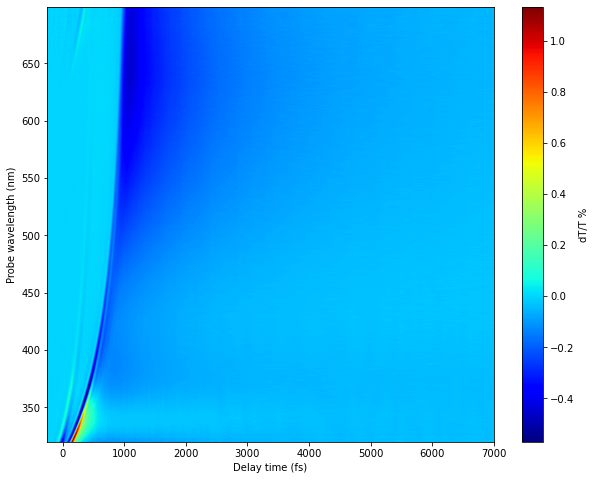

In [10]:
data.plot_map(figsize=(10,8))

### Shift zero
correct for zero shifting during the data taking. A proper wavelenght should be selected to be used as "realignment". You can try several times using `dry_run=True` in order to see the results and not modify the data.

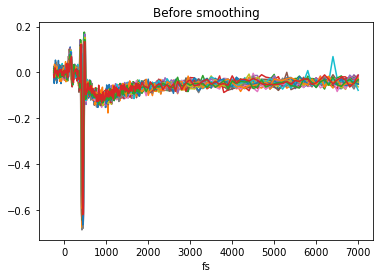

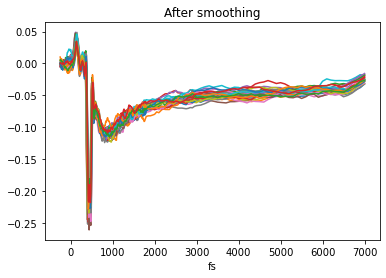

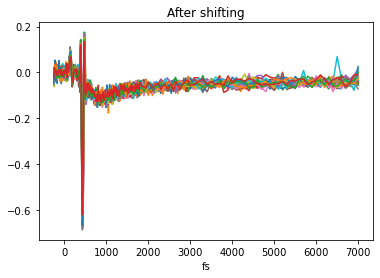

In [11]:
data.shift_zero(370, dry_run=False)

### Reject scans
As before, it is convenient to run a dry run and see the correlations, then decide the threshold or manually remove and select the scans to be kept.

0 scans have been rejected


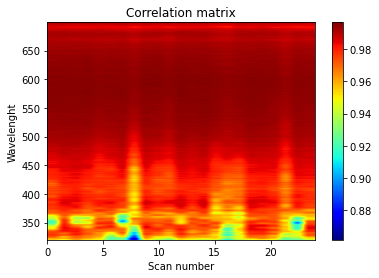

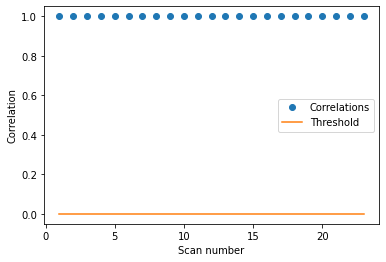

In [12]:
data.reject_scans(threshold=0, dry_run=False)

### Dechirp
With the following function a new window will open and you will be able to select eight points on the artifact to be use to dechirp.

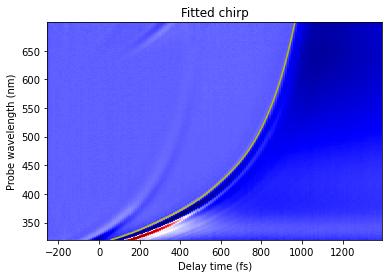

In [13]:
data.dechirp(max_delay=1400, n_points=9)

Let's plot the result

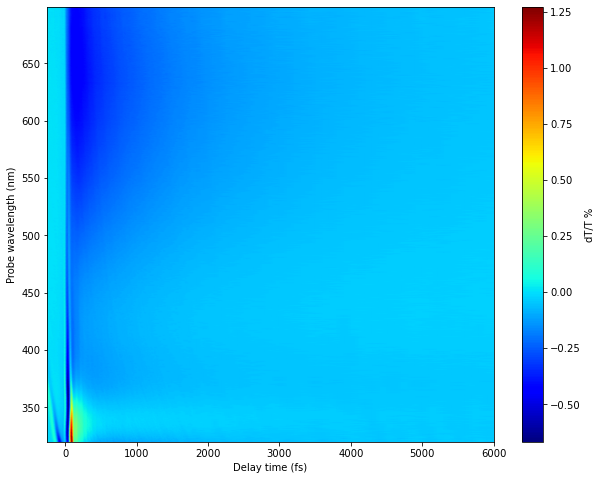

In [14]:
data.plot_map(figsize=(10,8))

If you are not satisfied by the dechirping you can run `data.reset_dechirp()` and run again the previus cells. 
If you are satisfied, let's save the preprocessed data. The `save` function will save in a numpy archive. The name will be the orinal file name plus the string passed to the function. 

In [15]:
data.save("dechirp")

### Smoothing
Final step in the preprocessing stage is to smooth data. 

- `smoothWindowLambdaNM` should be 3 (nm)
- `smoothWindowDelayFS` should be three times the minimum delay step in the data taking (here 10 fs)

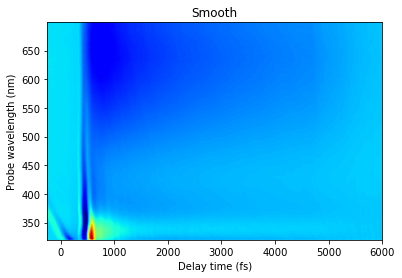

In [16]:
data.smooth(smoothWindowDelayFS=30, smoothWindowLambdaNM=3)

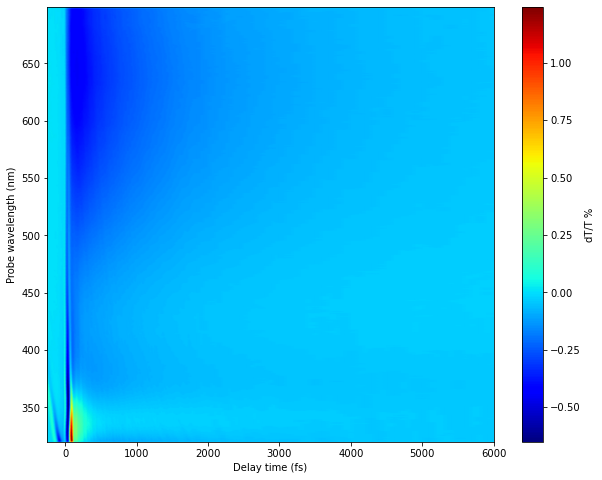

In [17]:
data.plot_map(figsize=(10,8))

Save final result

In [18]:
data.save("dechirp_smoothed")

### Done!